## Numerische Mathematik I: Seamless Cloning 

Technische Universität Berlin, Straße des 17. Juni 135, 10623 Berlin, Deutschland

---

**Franklin Liu** 

E-mail: franklin.f.liu@campus.tu-berlin.de

**Aleksandra Soloveva**

E-mail: soloveva@campus.tu-berlin.de

**Allan A. Zea**

E-mail: zealobo@campus.tu-berlin.de

---

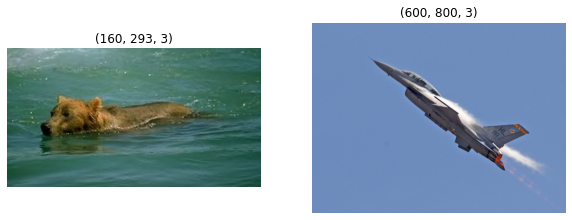

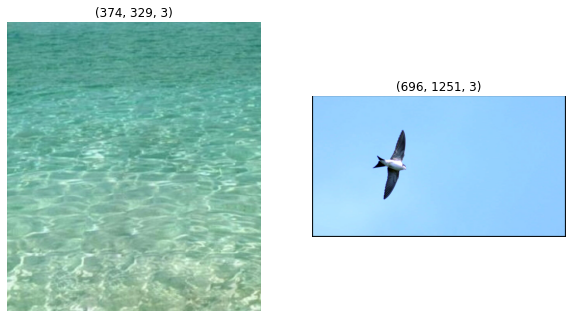

In [3]:
import skimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Bear = mpimg.imread('bear.jpg')
Water = mpimg.imread('water.jpg')
Plane = mpimg.imread('plane.jpg')
Bird = mpimg.imread('bird.jpg')

bilder = [Bear, Plane]
masken = [Water, Bird]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))
for ax, bild in zip(axes.flat, bilder):
    ax.imshow(bild)
    ax.set(title = bild.shape)
    ax.axis('off')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10)) 
for ax, bild in zip(axes.flat, masken):
    ax.imshow(bild)
    ax.set(title = bild.shape)
    ax.axis('off')

plt.show()

---

**Aufgabe 1.** Schreibe eine Funktion, welche den vektorisierten Laplace-Operator
$$ \Delta = (I_M \otimes D_N^{(2)}+D_M^{(2)} \otimes I_N)$$ 
für ein Bild der Größe $N \times M$ als dünnbesetzte (sparse) Metrix bestimmt. Stelle die Matrix für $(N,M) =(5,7)$ grafisch dar.

---

In [4]:
# 1)

import scipy.sparse

def laplace(N, M):
    return scipy.sparse.kron(scipy.sparse.eye(M), scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N))) \
        + scipy.sparse.kron(scipy.sparse.diags([1, -2, 1],[-1, 0, 1], shape=(M, M)),scipy.sparse.eye(N))


In [5]:
# Darstellung für Matrix N=5, M=7
np.set_printoptions(threshold = sys.maxsize)

N, M = 5, 7
test_laplace = laplace(N,M)

print("Laplace-Operator: \n", test_laplace.A)
print("Größe vom Laplace Operator:", test_laplace.shape)

Laplace-Operator: 
 [[-4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1. -4.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0

---

**Aufgabe 2.** Schreibe eine Funktion, um Seamless-Cloning mit Hilfe der Differenzengleichung $$ \Delta \operatorname{vec}(f) = \Delta \operatorname{vec}(g) \textnormal{   auf $\mathring{\Omega}$} \quad \textup{mit} \quad f|_{d\Omega} = f^*|_{d\Omega} $$ durchzuführen. Hierbei soll ein rechtekiges Bild $g$ in ein größeres Bild $f^*$ an einer gegebenen Position eingeführt werden. Implementiere als Hilfsfunktion das Seamless-Cloning für Grauwertbilder, wobei das Ergebnis wieder ein Grauwertbild sein soll - runde die Pixel entsprechend.

---

---

**Aufgabe 3.** Schreibe eine Funktion, um Seamless-Cloning mit Hilfe der Differenzengleichung $$ \Delta \operatorname{vec}(f) = \operatorname{vec}(\operatorname{div} v) \text{   auf $\mathring{\Omega}$} \quad \textup{mit} \quad f|_{d\Omega} = f^*|_{d\Omega} $$ und den gemischten Gradienten 

\begin{equation}
v_{n m}= \begin{cases}\nabla f_{n m}^{*} & \text { wenn }\left\|\nabla f_{n m}^{*}\right\|>\left\|\nabla g_{n m}\right\| \\ \nabla g_{n m} & \text { sonst }\end{cases}
\end{equation}

durchzuführen. Hierbei soll ein rechtekiges Bild $g$ in ein größeres Bild $f^*$ an einer gegebenen Position eingeführt werden. Implementiere als Hilfsfunktion das Seamless-Cloning für Grauwertbilder, wobei das Ergebnis wieder ein Grauwertbild sein soll - runde die Pixel entsprechend.

---

In [17]:
#Vektorisierter la-place
def gradient(bild, urbild = None):
    return laplace(bild.shape[0], bild.shape[1]) @ bild.reshape((bild.size,1), order = 'F')

In [18]:
# Differenzenmatrizen
def diff(s, richtung):
    if richtung == 'v':
        return scipy.sparse.diags([-1, 1], [0, 1], shape = (s,s))
    elif richtung == 'r':
        return scipy.sparse.diags([-1, 1], [-1, 0], shape = (s,s))
    else:
        raise Exception("Keine gültige Eingabe. Für Vorwärtsdifferenzen (v) bzw. Rückwartswärtsdifferenzen (r)")

# Divergebt
def divergenz(bild, urbild):
    grad_f1, grad_f2 = diff(urbild.shape[0], 'v') @ urbild, urbild @ (diff(urbild.shape[1], 'v').T)
    grad_g1, grad_g2 = diff(bild.shape[0], 'v') @ bild, bild @ (diff(bild.shape[1], 'v').T)

    v1 = np.zeros(bild.shape)
    v2 = np.zeros(bild.shape)

    # Wähle maximalen Gradient von f bzw g
    for i in range(bild.shape[0]):
        for j in range(bild.shape[1]):
            if grad_f1[i,j]**2 + grad_f2[i,j]**2 > grad_g1[i,j]**2 + grad_g2[i,j]**2:
                v1[i,j] = grad_f1[i,j]
                v2[i,j] = grad_f2[i,j]
            else:
                v1[i,j] = grad_g1[i,j]
                v2[i,j] = grad_g2[i,j]

    result = diff(v1.shape[0], 'r') @ v1 + v2 @ diff(v2.shape[1], 'r').T
    
    return result.reshape((result.size, 1), order ='F')

In [19]:
# 2-3) Cloning (Urbild = f*, Bild = g, func = Funktion zur berechnung vom Gradient von g bzw. gemischter Gradient von g und f*)
import scipy.sparse.linalg

def cloning(urbild, bild, func):

    # Indizes vom Bild um jeweils ein Pixel kleiner am Rand
    hoehe_inner, breite_inner = bild.shape[0] - 2, bild.shape[1] - 2

    hoehe_au, breite_au = bild.shape[0], bild.shape[1]

    # Setze Koeffizientenmatrix als Laplace-Operator Matrix
    A = laplace(hoehe_inner, breite_inner)

    # Index-array für Randelemente
    f1 = lambda x: x
    f2 = lambda x: x+1
    rand_indizes = np.concatenate([np.arange(hoehe_au-1), np.fromiter((f(x) for x in range(hoehe_au - 1, (breite_au - 1) * hoehe_au, hoehe_au) for f in (f1,f2)), dtype = int), \
                   np.arange(((breite_au - 1) * hoehe_au) + 1, breite_au * hoehe_au)])

    # Setze rechte Seite als Inneres vom Bild
    b = np.delete(func(bild, urbild), rand_indizes)

    # Subtrahiere verpassten Randelemente vom Urbild von der rechten Seite der Gleichung
    for i in range(hoehe_inner):
        b[i] -= urbild[i + 1, 0]
        b[b.size - 1 - i] -= urbild[urbild.shape[0] - 2 - i, -1]

    for j in range(breite_inner):
        index = j*hoehe_inner
        b[index] -= urbild[0, j + 1]
        b[b.size - 1 - index] -= urbild[-1, urbild.shape[1] - 1 - j]

    return scipy.sparse.linalg.cg(A, b)[0].astype(np.int32).reshape((hoehe_inner, breite_inner), order ='F')



---

**Aufgabe 4.** Schneide nun den Bären aus und füge ihn ins Wasser ein und plaziere das Flugzeug neben den Vogel. Der Himmel im Bild mit dem Flugzeug soll soll hierbei ein Teil des Vogels verdecken. Gib die Ergebnisse mittels Seamless-Cloning mit Laplace-Operator, mit gemischten Gradienten und ohne Semless-Cloning auf den Bildschirm aus.

---

In [20]:
# Ermittle geeignete Position zum Einfügen von g in f.
# h = horizontal, v = vertikal (zwischen 0 und 1) variert Position von g in f
# h = 0: links, h = 1: rechts, v = 0: oben, v = 1: unten
def p(A, B, h = 0.5, v = 0.5, k = 3):
    lx = round(v*(A.shape[0] - B.shape[0]))
    ly = round(h*(A.shape[1] - B.shape[1]))
    
    if lx < 0 or ly < 0:
        raise Exception("Einzufügende Bild zu groß!")

    if abs(h) <= 1 and abs(v) <= 1:
        return [np.s_[lx:lx+B.shape[0], ly:ly+B.shape[1]]] + [np.s_[lx+1:lx+B.shape[0]-1, ly+1:ly+B.shape[1]-1, i] for i in range(k)]
    else:
        raise Exception("h und v müssen zwischen 0 und 1 sein!")

In [21]:
#Hilfsfunktion zum Einfügen von Bildern

def insertimg(urbild, bild, h = 0.5, v = 0.5, func = None):

        pos = p(urbild, bild, h, v)
        
        if not func:
            urbild[pos[0]] = bild
            return urbild

        for i in range(3):
            temp = cloning(urbild[pos[0]][:,:,i], bild[:,:,i], func)
            urbild[pos[i+1]] = temp
            
        return urbild


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


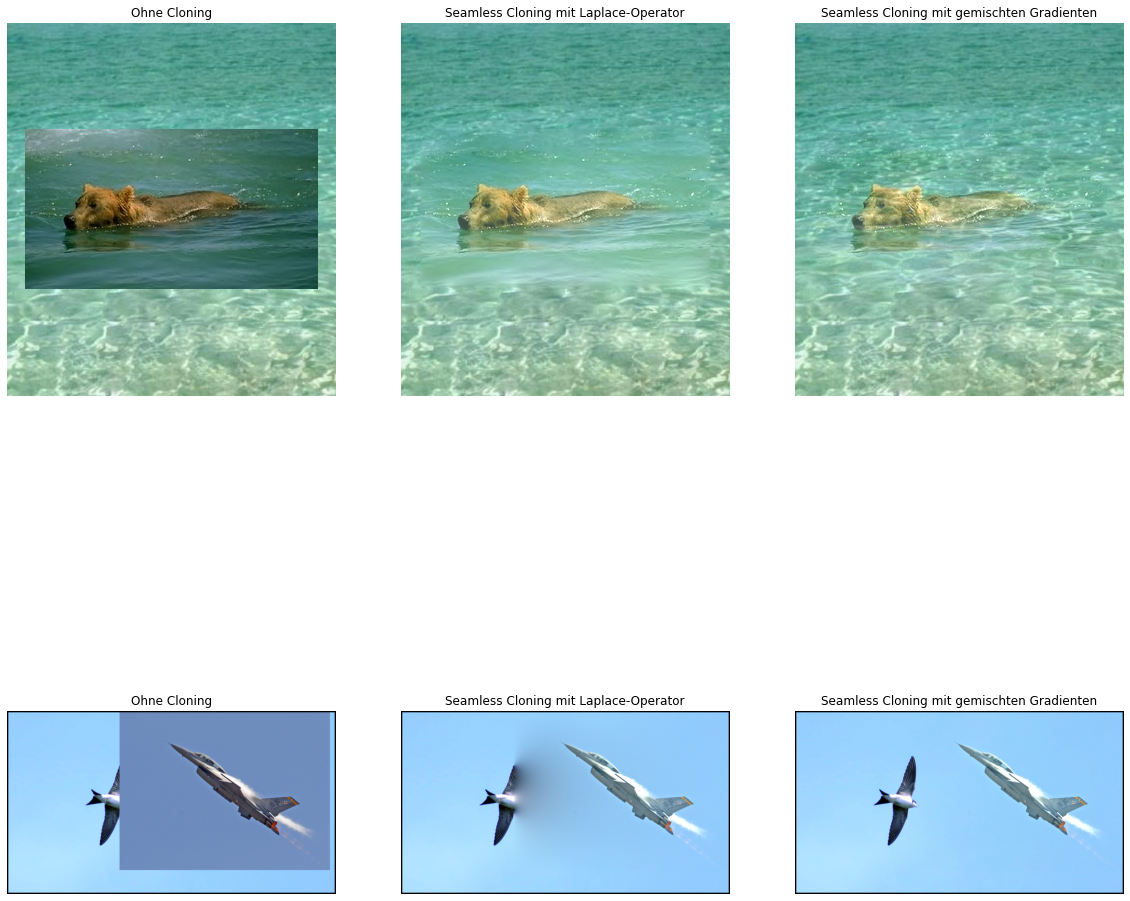

In [17]:
# 4) Seamless Cloning (kannst Essen gehen, dauert eine Weile)
import skimage.io

Bear = skimage.io.imread('bear.jpg').astype(np.int32)
Water = skimage.io.imread('water.jpg').astype(np.int32)
Plane = skimage.io.imread('plane.jpg').astype(np.int32)
Bird = skimage.io.imread('bird.jpg').astype(np.int32)

bilder = [Bear, Plane]
urbilder = [Water, Bird]

# Variiere Position der einzufügenden Bilder hier:
h_Bear, v_Bear = 0.5, 0.5
h_Plane, v_Plane = 0.95, 0.05

position = [(h_Bear, v_Bear), (h_Plane, v_Plane)]

cloned = []

for urbild, bild, pos in zip(urbilder, bilder, position):
    for i in [None, gradient, divergenz]:
        urbild_kopie = urbild.copy()
        cloned.append(insertimg(urbild_kopie, bild, h = pos[0], v = pos[1], func = i))

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 20))

for ax, bild, i in zip(axes.flat, cloned, range(len(urbild)+len(bild))):
    ax.imshow(bild)
    ax.axis('off')
    if i % 3 == 0:
        ax.set(title = "Ohne Cloning")
    elif i % 3 == 1:
        ax.set(title = "Seamless Cloning mit Laplace-Operator")
    elif i % 3 == 2:
         ax.set(title = "Seamless Cloning mit gemischten Gradienten")
        
plt.show()